In [1]:
# Source: https://github.com/ishaberry/Covid19Canada
# Source: https://resources-covid19canada.hub.arcgis.com/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Covid Confirmed Cases
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'
file = '04-13-2020.csv'
df = pd.read_csv(url+file)

# Summary by province
df_prov = pd.read_csv('data/canada/Cases (Province).csv')
df_prov

# Testing Numbers
path = 'data/Covid19Canada/'
df_testing = pd.read_csv(path + 'testing_cumulative.csv')
#Formating Dates, Sorting Values and Selecting Fields
df_testing['date_testing'] = pd.to_datetime(df_testing['date_testing'], format = "%d-%m-%Y")
df_testing.sort_values(['province','date_testing'], ascending=True, inplace = True)
df_testing.reset_index(inplace=True)
df_testing = df_testing[['date_testing', 'province', 'cumulative_testing']]

In [2]:
can = df[df['Country_Region'] == 'Canada'].sort_values('Confirmed', ascending=False)
can[['Province_State', 'Confirmed']][:-2]

,Province_State,Confirmed
2794,Quebec,13557
2790,Ontario,7470
2733,Alberta,1732
2741,British Columbia,1490
2789,Nova Scotia,474
2801,Saskatchewan,300
2777,Manitoba,246
2784,Newfoundland and Labrador,244
2781,New Brunswick,116
2791,Prince Edward Island,25


# Overview

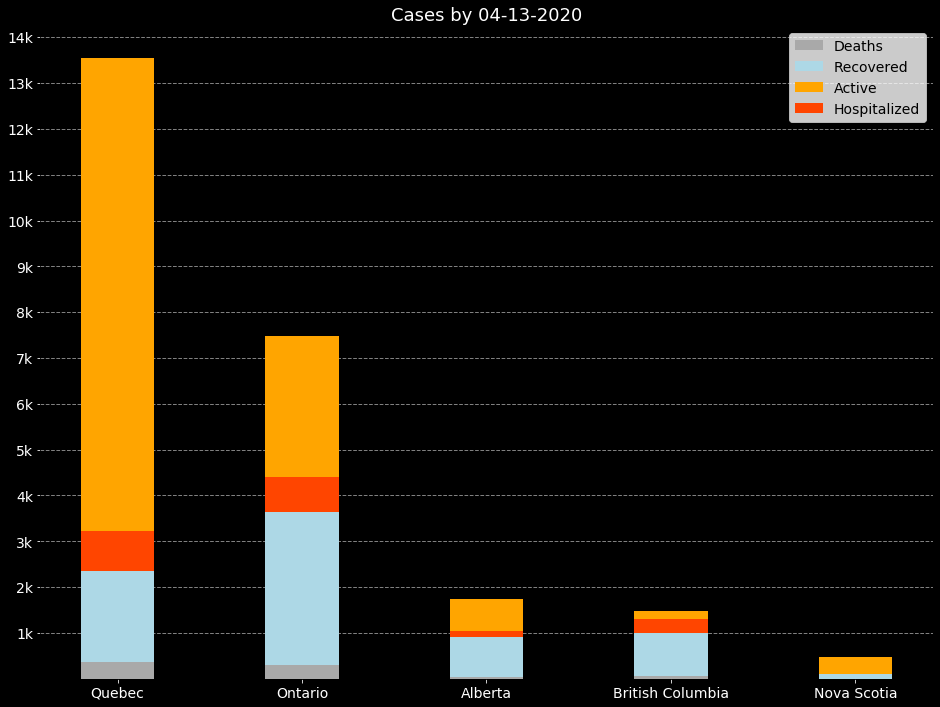

In [6]:
# Adjust Dataframe
provinces = ['Quebec', 'Ontario', 'British Columbia', 
             'Alberta', 'Nova Scotia']
can = df_prov[df_prov['NAME'].isin(provinces)].sort_values('Cases', ascending=False)
# Create figure
fig, ax = plt.subplots(1, figsize=(16,12), facecolor='black')

# Plot
# Deaths
plt.bar(x=can['NAME'], height=can['Deaths'], 
        width=0.4, color='darkgrey')
# Recoveries
plt.bar(x=can['NAME'], height=can['Recovered'], 
        width=0.4, color='lightblue', 
        bottom = can['Deaths'])
# Active
plt.bar(x=can['NAME'], height=can['Active Cases'], 
        width=0.4, color='orange',
        bottom = can['Deaths'] + can['Recovered'])
# Hospitalized
plt.bar(x=can['NAME'], height=can['Hospitalized'], 
        width=0.4, color='orangered', bottom = can['Deaths'] + can['Recovered'])

# Details (ticks, legend, title, labels)
plt.xticks(fontsize=14)
yticks = np.arange(1000,14001,1000)
yticks_label =[str(i)[:-3] + 'k' for i in yticks]
plt.yticks(yticks, labels = yticks_label, fontsize=14)
plt.legend(['Deaths', 'Recovered', 'Active', 'Hospitalized'], fontsize = 14)
plt.title('Cases by ' + file[:10], color='white', fontsize=18)

# Grid
ax.grid(color='grey', linestyle='dashed', linewidth=1, axis = 'y')
ax.set_axisbelow(True)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Colors
ax.set_facecolor('xkcd:black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')

# Save
plt.savefig('img/overview_canada.png', facecolor='black', edgecolor='none')

# Testing

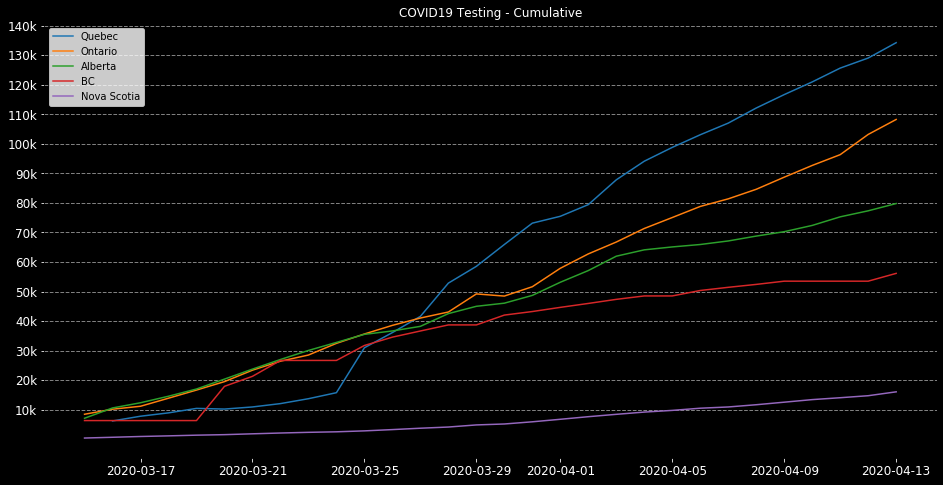

In [8]:
provinces = ['Quebec', 'Ontario', 'Alberta', 'BC', 'Nova Scotia']

fig, ax = plt.subplots(1, figsize=(16,8), facecolor = 'black')

# plots
for province in provinces:
    temp = df_testing[df_testing.province == province]
    plt.plot(temp['date_testing'], temp['cumulative_testing'])

#Details
plt.xticks(fontsize=12)
yticks = np.arange(10000, 140001, 10000)
yticks_label =[str(i)[:-3] + 'k' for i in yticks]
plt.yticks(yticks, fontsize = 12, labels = yticks_label)
plt.legend(provinces)
plt.title('COVID19 Testing - Cumulative', color='white')

# grid
ax.grid(color='grey', linestyle='dashed', linewidth=1, axis = 'y')
ax.set_axisbelow(True)

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#Colors
ax.set_facecolor('xkcd:black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')

plt.savefig('img/testing_canada.png', facecolor='black', edgecolor='none')

# Population Distribution by Age

In [19]:
# Prepare new dataframe
df_age = df_prov[['NAME', '2019 Total Pop 0 to 4 Yrs',
        '2019 Total Pop 5 to 9 Yrs', '2019 Total Pop 10 to 14 Yrs',
        '2019 Total Pop 15 to 19 Yrs', '2019 Total Pop 20 to 24 Yrs',
        '2019 Total Pop 25 to 29 Yrs', '2019 Total Pop 30 to 34 Yrs',
        '2019 Total Pop 35 to 39 Yrs', '2019 Total Pop 40 to 44 Yrs',
        '2019 Total Pop 45 to 49 Yrs', '2019 Total Pop 50 to 54 Yrs',
        '2019 Total Pop 55 to 59 Yrs', '2019 Total Pop 60 to 64 Yrs',
        '2019 Total Pop 65 to 69 Yrs', '2019 Total Pop 70 to 74 Yrs',
        '2019 Total Pop 75 to 79 Yrs', '2019 Total Pop 80 to 84 Yrs',
        '2019 Total Pop 85 or Older']].dropna().copy()
# Rename columns
df_age.columns = ['NAME', '0 to 4', '5 to 9', '10 to 14', '15 to 19', 
                '20 to 24', '25 to 29', '30 to 34', '35 to 39',
                '40 to 44', '45 to 49', '50 to 54', '55 to 59',
                '60 to 64', '65 to 69', '70 to 74', '75 to 79',
                '80 to 84', '85 or older']
df_age

In [191]:
# function to plot age distribution. input - name of province
def pop_age(name):
    df_test = df_age[df_age['NAME'] == name]
    df_test.set_index('NAME', inplace=True)
    df_test = df_test.T

    df_test.reset_index(inplace=True)
    df_test = df_test.sort_index(ascending=False)

    total = df_test.sum()[name]

    plt.barh(df_test['index'], df_test[name]/total * 100)
    
    #details
    plt.title(name + ' - Age Distribution', fontsize=16, color='white')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel('%', color='white', fontsize=18)
    
    # grid
    ax.grid(color='grey', linestyle='dashed', linewidth=1, axis = 'x')
    ax.set_axisbelow(True)

    # remove spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    #Colors
    ax.set_facecolor('xkcd:black')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.yaxis.label.set_color('white')
    ax.xaxis.label.set_color('white')
    
    
def pop_age2(name):
    df_test = df_age[df_age['NAME'] == name]
    df_test.set_index('NAME', inplace=True)
    df_test = df_test.T

    a = df_test[name].values[::2]
    b = df_test[name].values[1::2]

    df_age2 = pd.DataFrame(['0-9', '10-19', '20-29', '30-39',
                           '40-49', '50-59', '60-69', '70-79',
                           '80 or more'])

    df_age2['pop'] = a+b
    df_age2.columns = ['age', 'pop']
    df_age2

    total = df_age2.sum()['pop']

    df_age2.reset_index(inplace=True)
    df_age2 = df_age2.sort_index(ascending=False)
    
    plt.barh(df_age2['age'], df_age2['pop']/total * 100)
    
    #details
    plt.title(name + ' - Age Distribution', fontsize=16, color='white')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel('%', color='white', fontsize=18)
    
    # grid
    ax.grid(color='grey', linestyle='dashed', linewidth=1, axis = 'x')
    ax.set_axisbelow(True)

    # remove spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    #Colors
    ax.set_facecolor('xkcd:black')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.yaxis.label.set_color('white')
    ax.xaxis.label.set_color('white')


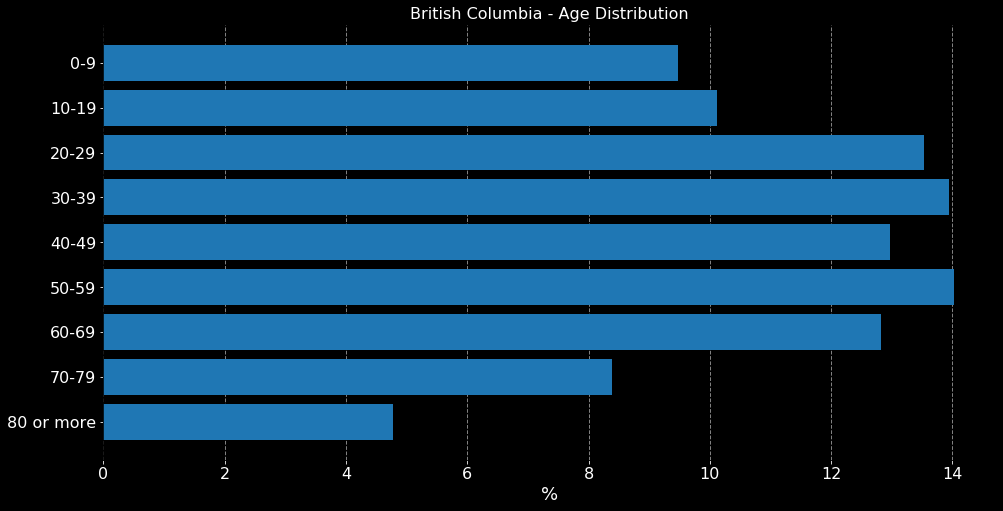

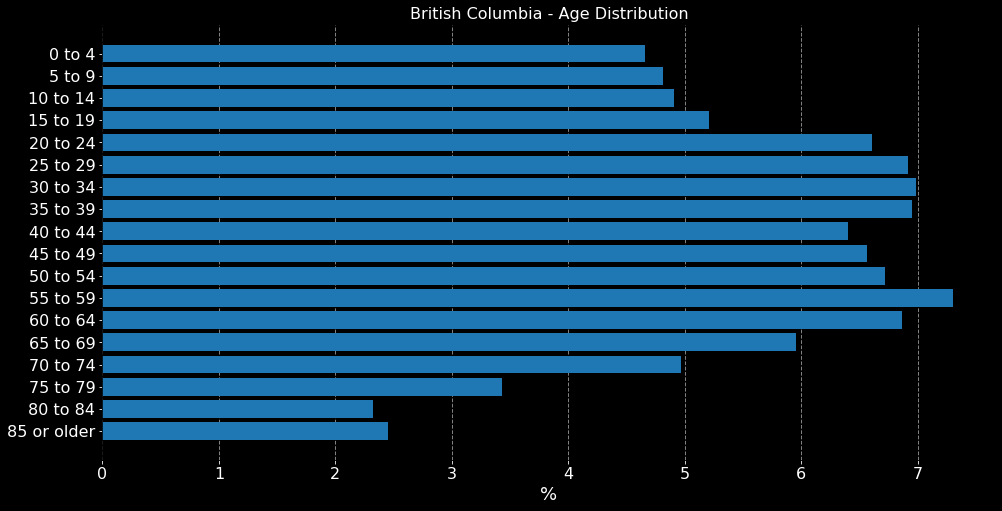

In [197]:
fig, ax = plt.subplots(1, figsize=(16,8), facecolor='black')

pop_age2('British Columbia')

    
plt.savefig('img/bc_age.png', facecolor='black', edgecolor='none')

fig, ax = plt.subplots(1, figsize=(16,8), facecolor='black')

pop_age('British Columbia')

plt.show()

# Others

In [97]:
path = 'data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/'
today = '04-13-2020'
today = pd.to_datetime(today, format = "%m-%d-%Y")

In [154]:
recoveries = pd.read_csv('data/Covid19Canada/recovered_cumulative.csv')
#recoveries = recoveries[recoveries['province'] == 'BC'].iloc[:-40,:].sort_index(ascending=False).reset_index()
recoveries = recoveries[recoveries['province'] == 'BC'].sort_index(ascending=False).reset_index()
recoveries.head()

,index,date_recovered,province,cumulative_recovered
0,123,12-02-2020,BC,0.0
1,122,13-02-2020,BC,0.0
2,121,14-02-2020,BC,0.0
3,120,15-02-2020,BC,0.0
4,119,16-02-2020,BC,0.0


In [118]:
def build_df(file):

    temp = pd.read_csv(path+file)
    
    try:
        temp = temp.groupby('Province_State').sum().copy()
    except:
        temp = temp.groupby('Province/State').sum().copy()
        
    df_new = pd.DataFrame(temp.index)
    df_new.columns = ['Province_State']

    df_new['Confirmed'] = temp['Confirmed'].values
    df_new['Deaths'] = temp['Deaths'].values
    df_new['Recovered'] = temp['Recovered'].values
    df_new['Active'] = df_new['Confirmed'] - df_new['Deaths'] - df_new['Recovered']
    df_new['Date'] = [file[:10] for i in np.arange(0,len(df_new))]
    return df_new


def get_range(first_file='01-22-2020', start='01-23-2020', end=today):
    start = pd.to_datetime(start, format = "%m-%d-%Y")
    end = pd.to_datetime(end, format = "%m-%d-%Y")

    dates = pd.date_range(start= start, end=end)
    files = []

    for i in dates.strftime('%m-%d-%Y'):
        files.append(str(i)+'.csv')

    df = build_df(first_file+'.csv')

    for file in files:
        #print(file)
        new = build_df(file)
        df = df.append(new, sort=False)

    return df


In [158]:
prov = get_range('02-12-2020', '02-13-2020')

prov = prov[prov['Province_State'] == 'British Columbia']
prov['Recovered'] = recoveries['cumulative_recovered'].values
prov['Active'] = prov['Confirmed'] - prov['Deaths'] - prov['Recovered']

In [161]:
prov.head()

,Province_State,Confirmed,Deaths,Recovered,Active,Date
3,British Columbia,4,0,0.0,4.0,02-12-2020
3,British Columbia,4,0,0.0,4.0,02-13-2020
3,British Columbia,4,0,0.0,4.0,02-14-2020
3,British Columbia,4,0,0.0,4.0,02-15-2020
3,British Columbia,4,0,0.0,4.0,02-16-2020


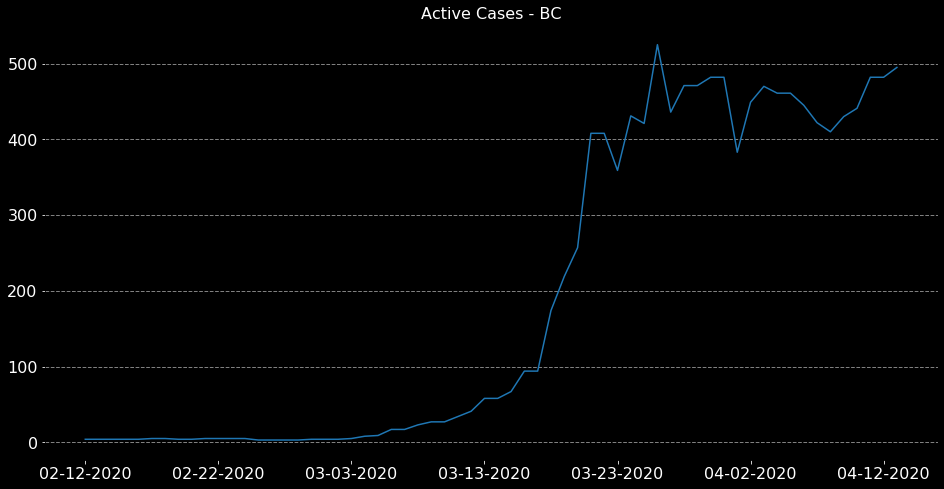

In [198]:
fig, ax = plt.subplots(1, figsize=(16,8), facecolor='black')
x = np.arange(len(prov['Date']))
plt.plot(x, prov['Active'])

#details
plt.title('Active Cases - BC', fontsize=16, color='white')
plt.xticks(x[::10] , prov['Date'].values[::10], fontsize=16)
plt.yticks(fontsize=16)
#plt.xlabel(color='white', fontsize=18)
    
# grid
ax.grid(color='grey', linestyle='dashed', linewidth=1, axis = 'y')
ax.set_axisbelow(True)

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#Colors
ax.set_facecolor('xkcd:black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
    
plt.savefig('img/bc_active.png', facecolor='black', edgecolor='none')

,age,pop
0,0-9,463462.0
1,10-19,494989.0
2,20-29,661981.0
3,30-39,682131.0
4,40-49,634541.0
5,50-59,686221.0
6,60-69,627408.0
7,70-79,410892.0
8,80 or more,233529.0
